# K-Means Clustering and Principal Component Analysis (PCA) From Scratch

This notebook implements:
- K-Means Clustering
- Principal Component Analysis (PCA)

Using only:
- NumPy
- Pandas
- Matplotlib

Dataset: Iris Dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load Dataset


In [2]:
df = pd.read_csv("Iris Dataset.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Separate Features and Species Column

Species column is removed before giving dataset to algorithms.


In [3]:
X = df.drop("Species", axis=1).values
y_actual = df["Species"].values


## Data Normalization


In [4]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1
    return (X - mean) / std

X = normalize(X)


## K-Means Clustering From Scratch


In [5]:
def kmeans(dataset, k=3, epochs=100):
    n_samples, n_features = dataset.shape

    # Randomly initialize centroids
    indices = np.random.choice(n_samples, k, replace=False)
    centroids = dataset[indices]

    for _ in range(epochs):
        clusters = []

        for x in dataset:
            distances = np.sqrt(np.sum((centroids - x) ** 2, axis=1))
            clusters.append(np.argmin(distances))

        clusters = np.array(clusters)

        new_centroids = []
        for i in range(k):
            points = dataset[clusters == i]
            if len(points) == 0:
                new_centroids.append(centroids[i])
            else:
                new_centroids.append(points.mean(axis=0))

        centroids = np.array(new_centroids)

    return clusters, centroids


In [6]:
clusters, centroids = kmeans(X, k=3)

## Plot K-Means Clustering Output

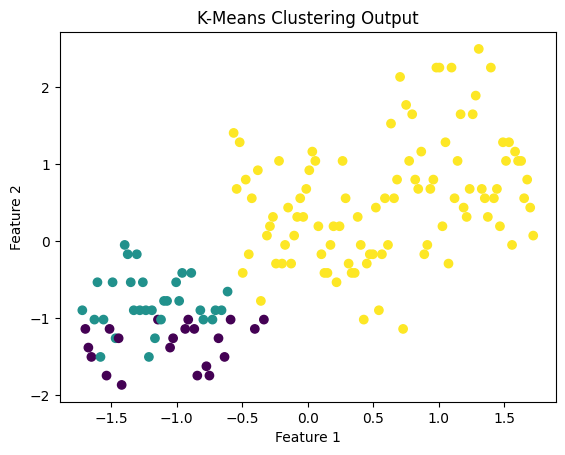

In [7]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Output")
plt.show()


## Plot Actual Species


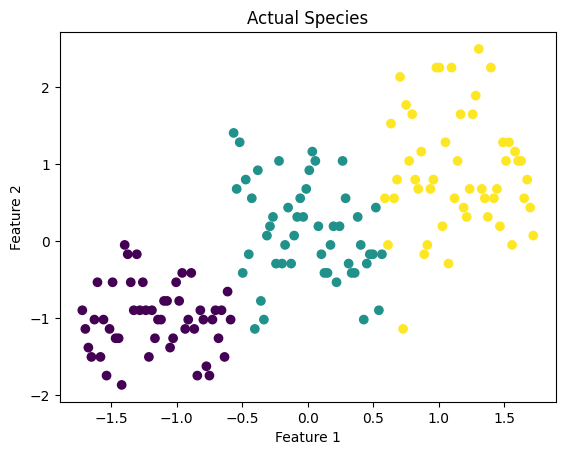

In [8]:
species_unique = np.unique(y_actual)
mapping = {species_unique[i]:i for i in range(len(species_unique))}
y_mapped = np.array([mapping[i] for i in y_actual])

plt.scatter(X[:,0], X[:,1], c=y_mapped)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Actual Species")
plt.show()


## Principal Component Analysis (PCA) From Scratch


In [9]:
def pca(dataset, n_components=3):
    mean = np.mean(dataset, axis=0)
    X_centered = dataset - mean

    covariance = np.cov(X_centered.T)

    eigenvalues, eigenvectors = np.linalg.eig(covariance)

    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    components = eigenvectors[:, :n_components]

    X_reduced = X_centered.dot(components)

    return X_reduced, eigenvalues[:n_components], components


In [10]:
X_pca, eigen_vals, eigen_vecs = pca(X, 3)

print("Top 3 Eigenvalues:")
print(eigen_vals)


Top 3 Eigenvalues:
[3.7603354  0.92794917 0.23570257]


## PCA Projection on First Three Principal Components


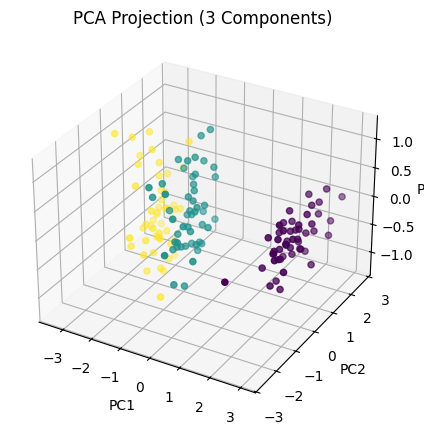

In [11]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_mapped)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA Projection (3 Components)")
plt.show()
